In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agregar la carpeta raíz del proyecto al path
sys.path.append(os.path.dirname(os.getcwd()))

In [ ]:
#1. Cargar el modelo de lightgbm
import joblib
import shap

model = joblib.load('..\models\lightgbm_model.joblib')
model

LGBMRegressor(max_depth=7, min_child_samples=30, n_estimators=300, n_jobs=-1,
              num_leaves=50, random_state=42, subsample=0.8, verbose=-1)

In [ ]:
import pandas as pd
#2. Cargar los datos procesados
data = pd.read_csv('../temp/train_processed.csv')
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,genre_metal,genre_pop,genre_punk,genre_rock,genre_sad,genre_sertanejo,genre_singer-songwriter,genre_soul,genre_spanish,popularity
0,2.007112,-1.165213,-1.800002,0.346066,1.608067,-0.529908,-0.725737,-1.328626,-0.731499,-1.390867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64
1,0.149011,1.779020,0.276719,0.377340,-0.082059,1.229685,0.521173,0.752657,1.038678,0.626714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
2,-0.874414,0.452947,0.344093,1.186891,-0.363746,-0.673052,1.016270,0.752657,-0.985310,-0.711406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
3,-0.282607,-0.855601,-0.325689,0.959331,0.481317,2.054680,-0.271021,-1.328626,0.609513,2.325667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,1.609166,-0.616090,-0.848832,0.468483,-0.645434,0.531916,-0.888429,0.752657,-1.040892,-0.855948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [9]:
target_col = 'popularity'
X = data.drop(columns=[target_col])
y = data[target_col]

In [10]:
# 3. Crear el explicador SHAP
explainer = shap.TreeExplainer(model)

In [12]:
# 4. Calcular los valores SHAP
shap_values = explainer.shap_values(X)

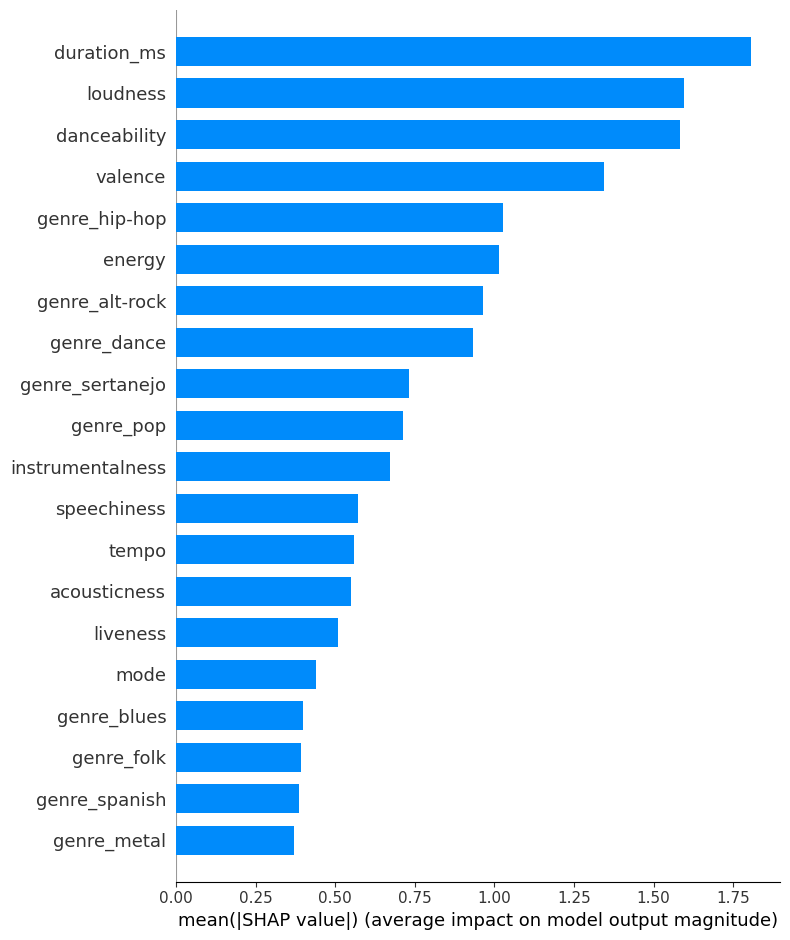

In [13]:
# Importancia global promedio de las features
shap.summary_plot(shap_values, X, plot_type="bar")


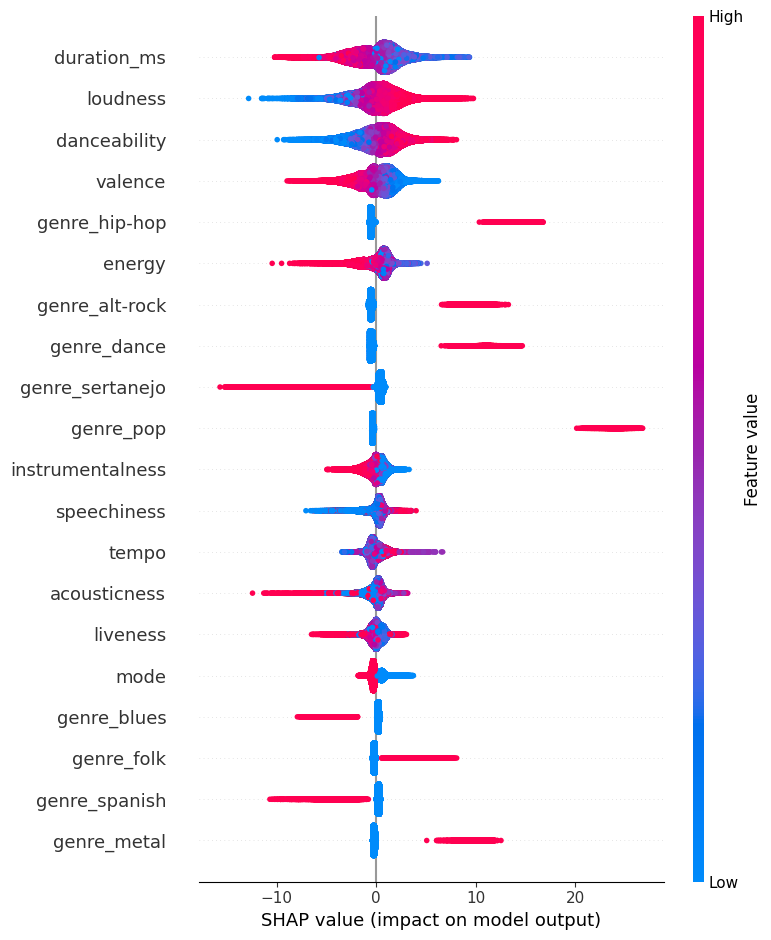

In [14]:
shap.summary_plot(shap_values, X)